# Notebook for make profiling of di-f Correlation experiments

## Experiment name: **mxretailsalary1**

## Experiment General Data
### Team roles:
* **PipeMaster**: jag.pascoe
* **BizEngineer**: 
* **DataEngineer**:
* **MLEngineer**:
* **SWEngineer**:

### Description (Use case):
Predict salary per day estimation to be obtained for working in retail sector in any state of Mexico.
Supposing you are looking for being hired in a Retail Business in any of Mexico's state you want to. You want to predict which would be the base salary per day you might get as attendant of that retail business. This salary not include any commision, tax, or any other concept.

### Type of experiment: Correlation
### Independent Variables (inputs):
1) State of Mexico where you are supposing to get hired (CAT). 
2) How many employees (including yourself) work in that particular business now (NUMBER)
3) How much sales per day in average, you estimate you will provide to that business in pesos (FLOAT)

### Dependent Variables (outputs):
1) Estimated base salary per day (FLOAT)

## Experiment preparation, imports and config.yaml

In [225]:
%load_ext autoreload
%autoreload 2
# The %load_ext autoreload and %autoreload 2 magic commands are used to automatically 
# reload modules when they are changed. This can be useful when you are developing code 
# in an interactive environment, as it allows you to see the changes you make to your modules 
# without having to restart the kernel.
import os
from hydra import initialize, initialize_config_module, initialize_config_dir, compose
from omegaconf import OmegaConf
import pandas as pd
import numpy as np
import os

# for global initialization: NOT RECOMMENDED
#initialize(version_base=None, config_path="../src/conf")
#compose(config_name='config')

with initialize(version_base=None, config_path="../src/conf"):
    cfg = compose(config_name='config')
    print(cfg)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
{'general_ml': {'seed': 123, 'encoding': 'iso-8859-1', 'cloud': 'AWS'}, 'paths': {'project_dir': '/home/jagpascoe/democlient-sklearn/dif-s-mxretailsalary1', 'raw_data': '${paths.project_dir}/data/raw', 'interim_data': '${paths.project_dir}/data/interim', 'processed_data': '${paths.project_dir}/data/processed', 'reports': '${paths.project_dir}/reports', 'models': '${paths.project_dir}/models', 'api': '${paths.project_dir}/API'}, 'cloud_paths': {'bucket_path': 'dif-b-democlient-sklearn', 'experiment_path': '${cloud_paths.bucket_path}/mxretailsalary1', 'mlflow_path': '${cloud_paths.experiment_path}/mlflow', 'reports_path': '${cloud_paths.experiment_path}/reports', 'rawdata_path': '${cloud_paths.experiment_path}/raw-data', 'dvc_path': '${cloud_paths.experiment_path}/dvc-store'}, 'file_names': {'raw_file': 'raw-data.csv', 'processed_data': 'processed_data.csv', 'processed_unseen_data': 'processed_unseen_

## ML Profiling with Pycaret

### Reading data and unseen_data

In [226]:
#reading processed_data

data = pd.read_csv(os.path.join(cfg.paths.processed_data, cfg.file_names.processed_data), 
                   #encoding=cfg.general_ml.encoding,
                   )
data.head()

,state,income_employee_day,employees_business,salary_employee_day
0,Veracruz,7994.591132,5,329.596014
1,Puebla,1548.324052,4,37.371991
2,Veracruz,18250.646834,7,942.254688
3,Oaxaca,7060.781633,5,131.860879
4,Coahuila,21440.227469,10,549.892948


In [227]:
unseen_data = pd.read_csv(os.path.join(cfg.paths.processed_data, cfg.file_names.processed_unseen_data), 
                   #encoding=cfg.general_ml.encoding,
                   )
unseen_data.head()

,state,income_employee_day,employees_business,salary_employee_day
0,Veracruz,7994.591132,5,329.596014
1,Puebla,1548.324052,4,37.371991
2,Veracruz,18250.646834,7,942.254688
3,Oaxaca,7060.781633,5,131.860879
4,Coahuila,21440.227469,10,549.892948


In [228]:
#Choose the Ml model to be applied, among: regression, Classifications, time_series, Clustering, NLP
from pycaret.regression import *
from pycaret import version_
version_

'3.0.3'

### Model to find
Setup the model with characteristics needed to get the key model.
The setup() function initializes the experiment in PyCaret and creates the transformation pipeline based on all the parameters passed in the function.

In [229]:
model_to_find =   setup(data = data, #see above 
                        #log_experiment = True,
                        #experiment_name = f'{cfg.general_ml.client}-{cfg.general_ml.project}-{cfg.general_ml.experiment}',
                        #target = cfg.data_fields.label, # get the target label from cfg
                        target='salary_employee_day',
                        #train_size=0.6, #default = 0.7
                        session_id=cfg.general_ml.seed, # get the seed from config
                        #train_size = 1.0-float(cfg.data_pipeline.data_transform_params.percent_valid), #get %valid from cfg
                        transformation=True, 
                        #transformation_method='quantile',
                        #fix_imbalance = True, #8:2
                        normalize=True,
                        normalize_method="minmax",
                        #polynomial_features=True,
                        #polynomial_degree = 5,
                        max_encoding_ohe =32, #default=25,
                        #remove_multicollinearity=True,
                        #categorical_features=['state'],
                        #remove_outliers=True,
                        #outliers_threshold=0.075, #default=0.05
                        )

,Description,Value
0,Session id,123
1,Target,salary_employee_day
2,Target type,Regression
3,Original data shape,"(750, 4)"
4,Transformed data shape,"(750, 35)"
5,Transformed train set shape,"(525, 35)"
6,Transformed test set shape,"(225, 35)"
7,Numeric features,2
8,Categorical features,1
9,Preprocess,True


In [230]:
#with this model_to_find, let's see how was transformed the dataset 
get_config('dataset_transformed')

,state_Hidalgo,state_Chiapas,state_Jalisco,state_Oaxaca,state_Guerrero,state_Veracruz,state_Puebla,state_Nuevo Leon,state_SLP,state_Nayarit,...,state_Guanajuato,state_BCS,state_Chihuahua,state_BC,state_Quintana Roo,state_Durango,state_Ags,income_employee_day,employees_business,salary_employee_day
240,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.398765,0.423972,216.723206
100,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.299316,0.423972,164.216873
626,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.359829,0.626233,146.385605
273,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.410480,0.540498,331.792908
349,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.296562,0.540498,140.815079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.763883,0.785227,758.243835
450,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.477272,0.423972,275.147308
155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.522232,0.540498,463.608795
75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.639773,0.848333,622.464294


### Getting the best model 
From all the possibles using compare_models() function.
This function trains and evaluates the performance of all estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

In [231]:
best_model=compare_models( sort='R2', #from which metric you will choose the best model
                          #include=['list', 'of', 'models'], #list of models to be included, comment if all
                          #n_select= 3, #if you want you can get the Top N models instead of just one model. 
                          cross_validation=True, #If you don't want to evaluate models using cross-validation
                          )

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,04:44:51
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,84.4969,16861.2211,127.4473,0.7198,0.3840,0.3450,0.2520
huber,Huber Regressor,91.3936,17206.7284,128.2243,0.7186,0.5216,0.4737,0.2610
ridge,Ridge Regression,91.8236,17423.2078,128.8930,0.7169,0.5303,0.4660,0.2440
br,Bayesian Ridge,91.9301,17244.3511,128.4141,0.7162,0.5331,0.5006,0.2490
lr,Linear Regression,92.5752,17336.8923,128.8437,0.7129,0.5243,0.5207,0.3020
et,Extra Trees Regressor,88.0269,17913.9396,131.3602,0.7062,0.4082,0.3600,0.3280
par,Passive Aggressive Regressor,93.7437,18542.7400,133.0541,0.7005,0.5632,0.4490,0.2160
lasso,Lasso Regression,94.0457,18210.9434,132.3686,0.6991,0.5576,0.5069,0.3270
llar,Lasso Least Angle Regression,94.0413,18210.0105,132.3644,0.6991,0.5577,0.5068,0.2190
gbr,Gradient Boosting Regressor,84.4934,18543.1683,129.8989,0.6985,0.3881,0.3475,0.2780


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

### This is the best model find it

In [232]:
best_model.get_params()
#To see which would be used in ensambled models below


{'loss_function': 'RMSE',
 'border_count': 254,
 'verbose': False,
 'task_type': 'CPU',
 'random_state': 123}

### Selected Model
Selected_model is the best model choosen, you may want to use another kfolds param to get this model.

This function trains and evaluates the performance of a given estimator using cross-validation. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function. All the available models can be accessed using the models function.

In [233]:
models() #to show available models in this library

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.ElasticNet,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPursuit,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [234]:
# And create the selected model in ten kfolds
selected_model = create_model(best_model,
                              #'gbr', 
                              fold=15, #default = None. Controls cross-validation. Integer:'n_splits'
                              cross_validation=True,
                              return_train_score=False, #To see the performance metrics on the training set by fold 
                              )

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,67.8250,7211.2792,84.9193,0.8622,0.4653,0.4669
1,107.1005,24401.0550,156.2084,0.4935,0.3951,0.3745
2,79.1841,16885.7676,129.9452,0.7227,0.3878,0.2787
3,68.6893,14467.0411,120.2790,0.8128,0.3469,0.2834
4,75.5507,11507.4936,107.2730,0.6658,0.2989,0.2671
5,83.9200,14248.2727,119.3661,0.7003,0.3675,0.3309
6,92.9227,20783.4485,144.1647,0.6813,0.4785,0.4607
7,93.7107,19137.5084,138.3384,0.5966,0.4188,0.3567
8,95.0340,20988.7031,144.8748,0.7095,0.3713,0.3040


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [235]:
print(selected_model, selected_model.get_params())

<catboost.core.CatBoostRegressor object at 0x7f9ff15e99f0> {'loss_function': 'RMSE', 'border_count': 254, 'verbose': False, 'task_type': 'CPU', 'random_state': 123}


In [236]:
#train models in a loop, just if needed
selected_models  = [create_model('catboost', border_count = i) for i in [250, 251, 252, 253, 254, 255]]
#you will see a table for each option:

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,04:46:17
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,91.1972,16720.1381,129.3064,0.6336,0.4636,0.4627
1,81.3780,16194.1123,127.2561,0.7473,0.3720,0.2813
2,66.9481,11802.1359,108.6376,0.8119,0.3264,0.2710
3,90.6881,16378.6066,127.9789,0.7383,0.3305,0.2964
4,82.6340,17666.2777,132.9146,0.5277,0.4888,0.4698
5,109.3765,25503.0789,159.6968,0.6326,0.3744,0.2999
6,79.9867,12011.9097,109.5989,0.7699,0.3524,0.3036
7,94.3163,32423.4987,180.0653,0.6786,0.3019,0.2474
8,67.6696,7731.6071,87.9296,0.8268,0.3414,0.3096


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,92.3319,16970.7501,130.2718,0.6282,0.4617,0.4616
1,78.7436,15425.5864,124.1998,0.7593,0.3676,0.2742
2,67.6106,11332.9333,106.4563,0.8194,0.3296,0.2790
3,91.0979,16033.2962,126.6227,0.7438,0.3331,0.3016
4,81.5568,17967.9158,134.0445,0.5196,0.4806,0.4606
5,106.2023,24604.9139,156.8595,0.6455,0.3681,0.2906
6,82.5586,12363.1087,111.1895,0.7632,0.3565,0.3082
7,96.5976,33329.4277,182.5635,0.6696,0.3045,0.2516
8,65.8199,7355.8169,85.7661,0.8352,0.3387,0.3048


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,90.6358,16895.8610,129.9841,0.6298,0.4646,0.4610
1,80.3424,15974.6548,126.3909,0.7507,0.3656,0.2765
2,68.0292,13634.4302,116.7666,0.7827,0.3276,0.2745
3,92.8823,16268.1277,127.5466,0.7401,0.3406,0.3109
4,81.6154,17849.3826,133.6016,0.5228,0.4801,0.4586
5,107.4002,25497.7195,159.6801,0.6327,0.3695,0.2947
6,79.6353,11581.1441,107.6157,0.7782,0.3495,0.3025
7,96.1790,33385.1590,182.7161,0.6691,0.3055,0.2504
8,66.3769,7622.5004,87.3069,0.8292,0.3466,0.3144


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,91.2989,16907.4253,130.0286,0.6295,0.4627,0.4574
1,81.5643,16350.0973,127.8675,0.7448,0.3752,0.2850
2,67.0367,12430.6672,111.4929,0.8019,0.3269,0.2715
3,89.6580,15245.6663,123.4733,0.7564,0.3350,0.3033
4,80.6398,17351.7027,131.7259,0.5361,0.4799,0.4591
5,106.8136,25200.8716,158.7478,0.6369,0.3646,0.2886
6,81.4126,12151.6811,110.2347,0.7672,0.3574,0.3091
7,93.9409,32881.6622,181.3330,0.6741,0.3017,0.2423
8,65.6635,7280.2883,85.3246,0.8369,0.3459,0.3146


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,88.9293,15959.7037,126.3317,0.6503,0.4608,0.4566
1,80.8553,15791.6656,125.6649,0.7536,0.3708,0.2819
2,67.6273,11928.2623,109.2166,0.8099,0.3257,0.2756
3,90.6408,16396.8920,128.0503,0.7380,0.3367,0.3033
4,83.7625,18510.8072,136.0544,0.5051,0.4865,0.4737
5,107.0335,24589.7433,156.8112,0.6457,0.3634,0.2921
6,82.3141,12523.0944,111.9066,0.7601,0.3564,0.3068
7,94.5064,32572.7997,180.4794,0.6771,0.3021,0.2479
8,67.0014,7533.5669,86.7961,0.8312,0.3425,0.3123


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,88.4532,16170.7521,127.1643,0.6457,0.4521,0.4443
1,79.9592,16009.5180,126.5287,0.7502,0.3650,0.2742
2,68.2689,11956.7279,109.3468,0.8095,0.3305,0.2811
3,91.7946,15751.5007,125.5050,0.7483,0.3401,0.3096
4,81.8137,18354.6314,135.4793,0.5093,0.4797,0.4610
5,106.5829,25591.5071,159.9735,0.6313,0.3668,0.2836
6,81.1981,12446.2854,111.5629,0.7616,0.3612,0.3099
7,94.5735,32668.0589,180.7431,0.6762,0.3053,0.2455
8,67.4157,7799.2262,88.3132,0.8253,0.3422,0.3122


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [237]:
# You can also write your own class with fit and predict function. 
# PyCaret will be compatible with that. Here is a simple example

"""
# load dataset 
from pycaret.datasets #import get_data 
insurance= get_data('insurance') 

# init setup
from pycaret.regression import * 
reg1 = setup(data = insurance, target = 'charges')

# create custom estimator
import numpy as np
from sklearn.base import BaseEstimator
class MyOwnModel(BaseEstimator):
    
    def __init__(self):
        self.mean = 0
        
    def fit(self, X, y):
        self.mean = y.mean()
        return self
    
    def predict(self, X):
        return np.array(X.shape[0]*[self.mean])
        
# create an instance
my_own_model = MyOwnModel()

# train model
my_model_trained = create_model(my_own_model)
"""

"\n# load dataset \nfrom pycaret.datasets #import get_data \ninsurance= get_data('insurance') \n\n# init setup\nfrom pycaret.regression import * \nreg1 = setup(data = insurance, target = 'charges')\n\n# create custom estimator\nimport numpy as np\nfrom sklearn.base import BaseEstimator\nclass MyOwnModel(BaseEstimator):\n    \n    def __init__(self):\n        self.mean = 0\n        \n    def fit(self, X, y):\n        self.mean = y.mean()\n        return self\n    \n    def predict(self, X):\n        return np.array(X.shape[0]*[self.mean])\n        \n# create an instance\nmy_own_model = MyOwnModel()\n\n# train model\nmy_model_trained = create_model(my_own_model)\n"

### Tunned Model
This function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross-validated scores by fold. The best model is selected based on the metric defined in optimize parameter. Metrics evaluated during cross-validation can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

The tuning grid for hyperparameters is already defined by PyCaret for all the models in the library. However, if you wish you can define your own search space by passing a custom grid using custom_grid parameter. 


In [238]:
# Now lets find the best hyperparameters for the selected model 

tuned_model = tune_model(selected_model, 
                         optimize = 'r2', #which metric to optimize
                         n_iter=10,
                         
                         choose_better=True, #will always return a better performing model meaning that if 
                                             #hyperparameter tuning doesn't improve the performance, 
                                             #it will return the input model.
                         
                         custom_grid={ #comment if need full search:
                                          'border_count': [252, 253, 254],
                          #               'alpha': [0.01, 0.001, 0.0001], 
                           #              'epsilon': [.95, 1.05, 1.25, 1.35],
                                      }
                        )

#NOTE: choose_better doesn't affect the scoring grid that is displayed on the screen. 
#The scoring grid will always present the performance of the best model as selected by the tuner, 
#regardless of the fact that output performance < input performance.



,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,04:46:41
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,91.2989,16907.4253,130.0286,0.6295,0.4627,0.4574
1,81.5643,16350.0973,127.8675,0.7448,0.3752,0.2850
2,67.0367,12430.6672,111.4929,0.8019,0.3269,0.2715
3,89.6580,15245.6663,123.4733,0.7564,0.3350,0.3033
4,80.6398,17351.7027,131.7259,0.5361,0.4799,0.4591
5,106.8136,25200.8716,158.7478,0.6369,0.3646,0.2886
6,81.4126,12151.6811,110.2347,0.7672,0.3574,0.3091
7,93.9409,32881.6622,181.3330,0.6741,0.3017,0.2423
8,65.6635,7280.2883,85.3246,0.8369,0.3459,0.3146


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 3 candidates, totalling 30 fits


In [239]:
print(tuned_model)

In [240]:
#PyCaret integrates seamlessly with many different libraries for hyperparameter tuning. 
#This gives you access to many different types of search algorithms including random, bayesian, optuna, TPE, 
#and a few others. All of this just by changing a parameter. By default, PyCaret using RandomGridSearch 
#from the sklearn and you can change that by using search_library and search_algorithm parameter in
#the tune_model function
"""
# load dataset
from pycaret.datasets import get_data 
boston = get_data('boston') 

# init setup
from pycaret.regression import * 
reg1 = setup(boston, target = 'medv')

# train model
dt = create_model('dt')

# tune model sklearn
tune_model(dt)

# tune model optuna
tune_model(dt, search_library = 'optuna')

# tune model scikit-optimize
tune_model(dt, search_library = 'scikit-optimize')

# tune model tune-sklearn
tune_model(dt, search_library = 'tune-sklearn', search_algorithm = 'hyperopt')
"""

"\n# load dataset\nfrom pycaret.datasets import get_data \nboston = get_data('boston') \n\n# init setup\nfrom pycaret.regression import * \nreg1 = setup(boston, target = 'medv')\n\n# train model\ndt = create_model('dt')\n\n# tune model sklearn\ntune_model(dt)\n\n# tune model optuna\ntune_model(dt, search_library = 'optuna')\n\n# tune model scikit-optimize\ntune_model(dt, search_library = 'scikit-optimize')\n\n# tune model tune-sklearn\ntune_model(dt, search_library = 'tune-sklearn', search_algorithm = 'hyperopt')\n"

### Essemble models
This function ensembles a given estimator. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.+

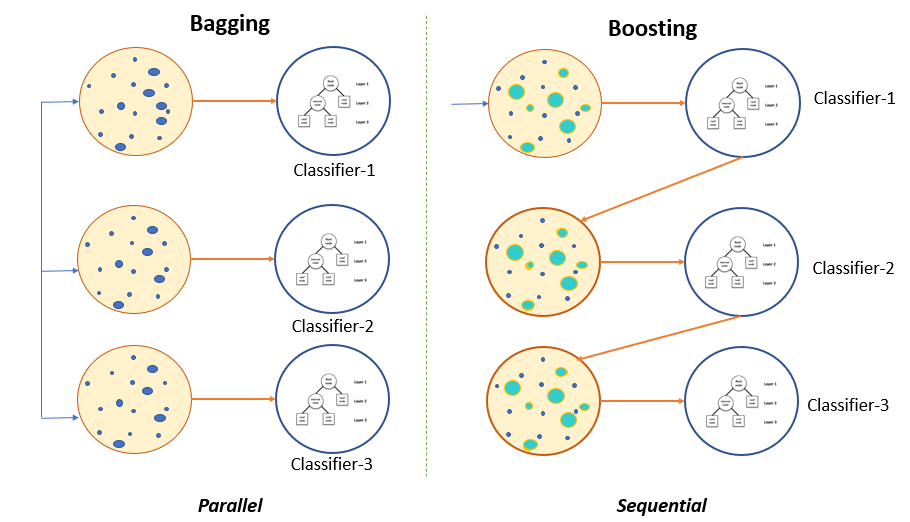



** Bagging: 
Also known as Bootstrap aggregating, is a machine learning ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression. It also reduces variance and helps to avoid overfitting. Although it is usually applied to decision tree methods, it can be used with any type of method. Bagging is a special case of the model averaging approach.

In [241]:
bagging_model = ensemble_model(tuned_model, 
                               n_estimators=10, #By default, PyCaret uses 10 estimators
                               choose_better=True, #When set to True it will always return a better performing model 
                                                   #meaning that if hyperparameter tuning doesn't improve the performance, 
                                                   #it will return the input model
                               method = 'Bagging')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,04:47:04
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,88.3779,15574.8222,124.7991,0.6587,0.4432,0.4434
1,76.4776,14316.3873,119.6511,0.7766,0.3666,0.2751
2,60.8158,7892.7730,88.8413,0.8742,0.3203,0.2600
3,91.9990,18252.9440,135.1035,0.7083,0.3428,0.3073
4,83.0600,19084.5732,138.1469,0.4898,0.4889,0.4674
5,104.5207,24659.6532,157.0339,0.6447,0.3631,0.2912
6,76.9565,11609.4467,107.7471,0.7776,0.3395,0.2815
7,95.4692,36122.2679,190.0586,0.6420,0.3020,0.2421
8,65.5993,7195.7872,84.8280,0.8388,0.3403,0.3121


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [242]:
print(bagging_model)

BaggingRegressor(estimator=<catboost.core.CatBoostRegressor object at 0x7f9ff2366740>,
                 random_state=123)




** Boosting: 
Is an ensemble meta-algorithm for primarily reducing bias and variance in supervised learning. Boosting is in the family of machine learning algorithms that convert weak learners to strong ones. A weak learner is defined to be a classifier that is only slightly correlated with the true classification (it can label examples better than random guessing). In contrast, a strong learner is a classifier that is arbitrarily well-correlated with the true classification.

In [243]:
boosted_model = ensemble_model(tuned_model, 
                               n_estimators=10, #By default, PyCaret uses 10 estimators
                               choose_better=True, #When set to True it will always return a better performing model 
                                                   #meaning that if hyperparameter tuning doesn't improve the performance, 
                                                   #it will return the input model
                               method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,96.2101,18838.2578,137.2525,0.5872,0.4664,0.4819
1,86.5755,16497.9386,128.4443,0.7425,0.3923,0.3076
2,66.8569,12108.2110,110.0373,0.8071,0.3278,0.2717
3,95.6252,18339.1980,135.4223,0.7070,0.3486,0.3200
4,88.1861,20809.9126,144.2564,0.4436,0.5055,0.5033
5,105.6879,25074.5906,158.3496,0.6388,0.3530,0.2872
6,77.0086,11493.1212,107.2060,0.7798,0.3553,0.2972
7,87.8980,30341.7060,174.1887,0.6993,0.2936,0.2314
8,68.4966,8236.9788,90.7578,0.8155,0.3600,0.3293


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


In [244]:
print(boosted_model)

### Blend model
This function trains a Soft Voting / Majority Rule classifier for select models passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function

In [245]:
top_best_models = ['huber','br','catboost','gbr'] #you must see the models comparision
top_models=[]
for i,model in enumerate(top_best_models):
    print(f'{i+1} of {len(top_best_models)}: model: {model}')
    top_models.append(create_model(model))

print(f'Blend for {i+1} Models:')
blend_model = blend_models(top_models,
                          fold = 5, #evaluation is done using fold cross-validation.
                          weights=[0.25, 0.25, 0.40, 0.1], #weights to be given to each input model.
                          )

print(blend_model)

1 of 4: model: huber


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,04:47:38
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Huber Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,89.9226,14058.1001,118.5669,0.6920,0.5221,0.5491
1,89.4765,14500.3629,120.4175,0.7737,0.4794,0.4198
2,73.0613,8688.9446,93.2145,0.8615,0.5263,0.3566
3,84.7307,15645.1103,125.0804,0.7500,0.3720,0.3277
4,95.6487,17645.2840,132.8356,0.5283,0.4872,0.5584
5,106.2484,23573.0611,153.5352,0.6604,0.4848,0.3457
6,97.8535,15035.4721,122.6192,0.7120,0.7472,0.5894
7,104.6751,37679.7276,194.1127,0.6265,0.6460,0.5105
8,75.0755,8683.0316,93.1828,0.8055,0.4827,0.4981


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

2 of 4: model: br


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,93.2619,15512.6235,124.5497,0.6601,0.4766,0.5871
1,88.4754,13841.1142,117.6483,0.7840,0.5577,0.4369
2,72.6161,8303.9692,91.1261,0.8677,0.4417,0.3824
3,85.0913,14404.7657,120.0199,0.7698,0.3603,0.3421
4,94.6049,17863.6776,133.6551,0.5224,0.5891,0.5743
5,105.4261,23635.6248,153.7388,0.6595,0.4734,0.3530
6,96.7307,14515.0405,120.4784,0.7220,0.8726,0.6152
7,104.2263,38180.8160,195.3991,0.6216,0.5276,0.5179
8,81.2205,10297.0739,101.4745,0.7693,0.5330,0.5376


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

3 of 4: model: catboost


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,88.9293,15959.7037,126.3317,0.6503,0.4608,0.4566
1,80.8553,15791.6656,125.6649,0.7536,0.3708,0.2819
2,67.6273,11928.2623,109.2166,0.8099,0.3257,0.2756
3,90.6408,16396.8920,128.0503,0.7380,0.3367,0.3033
4,83.7625,18510.8072,136.0544,0.5051,0.4865,0.4737
5,107.0335,24589.7433,156.8112,0.6457,0.3634,0.2921
6,82.3141,12523.0944,111.9066,0.7601,0.3564,0.3068
7,94.5064,32572.7997,180.4794,0.6771,0.3021,0.2479
8,67.0014,7533.5669,86.7961,0.8312,0.3425,0.3123


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

4 of 4: model: gbr


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,85.2921,17434.9716,132.0416,0.6180,0.4566,0.4672
1,78.6793,13945.1334,118.0895,0.7824,0.3574,0.2678
2,63.9623,7520.7373,86.7222,0.8802,0.3329,0.2812
3,87.4495,14618.7140,120.9079,0.7664,0.3473,0.3088
4,85.6840,17054.5052,130.5929,0.5440,0.4841,0.4739
5,127.2411,49575.0530,222.6546,0.2858,0.4073,0.3404
6,80.0539,12794.6190,113.1133,0.7549,0.3663,0.3144
7,92.0348,33972.2027,184.3155,0.6633,0.3103,0.2486
8,65.3716,6698.8704,81.8466,0.8499,0.3446,0.3214


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Blend for 4 Models:


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,81.2454,12967.2712,113.8739,0.7642,0.5905,0.3867
1,66.7434,8640.0719,92.9520,0.8397,0.4238,0.2809
2,93.2200,18973.8710,137.7457,0.6943,0.4738,0.3910
3,94.7855,26690.2283,163.3714,0.6667,0.4526,0.3648
4,75.2125,9638.8373,98.1776,0.8415,0.4177,0.4459
Mean,82.2414,15382.0559,121.2241,0.7613,0.4717,0.3739
Std,10.6627,6708.8895,26.2063,0.0721,0.0628,0.0536


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingRegressor(estimators=[('Huber Regressor', HuberRegressor()),
                            ('Bayesian Ridge', BayesianRidge()),
                            ('CatBoost Regressor',
                             <catboost.core.CatBoostRegressor object at 0x7f9ff316ad40>),
                            ('Gradient Boosting Regressor',
                             GradientBoostingRegressor(random_state=123))],
                n_jobs=-1, weights=[0.25, 0.25, 0.4, 0.1])


In [246]:
# or a shorcut using compare_models() function
blend_model_shortcut = blend_models(compare_models(n_select=4),
                                   weights=[0.55, 0.30, 0.10, 0.05], #weights to be given to each input model.
                                   )

print(blend_model_shortcut)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,04:47:58
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,84.4969,16861.2211,127.4473,0.7198,0.3840,0.3450,0.2130
huber,Huber Regressor,91.3936,17206.7284,128.2243,0.7186,0.5216,0.4737,0.2120
ridge,Ridge Regression,91.8236,17423.2078,128.8930,0.7169,0.5303,0.4660,0.2400
br,Bayesian Ridge,91.9301,17244.3511,128.4141,0.7162,0.5331,0.5006,0.2950
lr,Linear Regression,92.5752,17336.8923,128.8437,0.7129,0.5243,0.5207,0.3530
et,Extra Trees Regressor,88.0269,17913.9396,131.3602,0.7062,0.4082,0.3600,0.2720
par,Passive Aggressive Regressor,93.7437,18542.7400,133.0541,0.7005,0.5632,0.4490,0.2440
lasso,Lasso Regression,94.0457,18210.9434,132.3686,0.6991,0.5576,0.5069,0.2260
llar,Lasso Least Angle Regression,94.0413,18210.0105,132.3644,0.6991,0.5577,0.5068,0.2540
gbr,Gradient Boosting Regressor,84.4934,18543.1683,129.8989,0.6985,0.3881,0.3475,0.2640


Processing:   0%|          | 0/88 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,88.5080,13830.4236,117.6028,0.6970,0.6430,0.4748
1,78.1825,13584.6290,116.5531,0.7880,0.3555,0.2814
2,59.7608,6518.7872,80.7390,0.8961,0.3366,0.2559
3,82.6009,14990.7683,122.4368,0.7605,0.4265,0.2944
4,81.6578,16648.0024,129.0271,0.5549,0.5225,0.4581
5,103.3182,23005.7907,151.6766,0.6686,0.5499,0.2988
6,83.0381,12468.1238,111.6608,0.7612,0.3725,0.3604
7,96.5036,33866.3079,184.0280,0.6643,0.3892,0.3348
8,68.0194,7255.3427,85.1783,0.8375,0.3664,0.3817


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingRegressor(estimators=[('CatBoost Regressor',
                             <catboost.core.CatBoostRegressor object at 0x7f9ff215bbb0>),
                            ('Huber Regressor', HuberRegressor()),
                            ('Ridge Regression', Ridge(random_state=123)),
                            ('Bayesian Ridge', BayesianRidge())],
                n_jobs=-1, weights=[0.55, 0.3, 0.1, 0.05])


### Stack model
This function trains a meta-model over select estimators passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

In [247]:
top_best_models = ['catboost','huber','ridge','br']
top_models=[]
for i,model in enumerate(top_best_models):
    print(f'{i+1} of {len(top_best_models)}: model: {model}')
    top_models.append(create_model(model))

print(f'Stack for {i+1} Models:')
stack_model = stack_models(top_models,
                          fold = 5, #evaluation is done using fold cross-validation.
                          )

print(stack_model)

1 of 4: model: catboost


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,04:49:18
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,88.9293,15959.7037,126.3317,0.6503,0.4608,0.4566
1,80.8553,15791.6656,125.6649,0.7536,0.3708,0.2819
2,67.6273,11928.2623,109.2166,0.8099,0.3257,0.2756
3,90.6408,16396.8920,128.0503,0.7380,0.3367,0.3033
4,83.7625,18510.8072,136.0544,0.5051,0.4865,0.4737
5,107.0335,24589.7433,156.8112,0.6457,0.3634,0.2921
6,82.3141,12523.0944,111.9066,0.7601,0.3564,0.3068
7,94.5064,32572.7997,180.4794,0.6771,0.3021,0.2479
8,67.0014,7533.5669,86.7961,0.8312,0.3425,0.3123


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

2 of 4: model: huber


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,89.9226,14058.1001,118.5669,0.6920,0.5221,0.5491
1,89.4765,14500.3629,120.4175,0.7737,0.4794,0.4198
2,73.0613,8688.9446,93.2145,0.8615,0.5263,0.3566
3,84.7307,15645.1103,125.0804,0.7500,0.3720,0.3277
4,95.6487,17645.2840,132.8356,0.5283,0.4872,0.5584
5,106.2484,23573.0611,153.5352,0.6604,0.4848,0.3457
6,97.8535,15035.4721,122.6192,0.7120,0.7472,0.5894
7,104.6751,37679.7276,194.1127,0.6265,0.6460,0.5105
8,75.0755,8683.0316,93.1828,0.8055,0.4827,0.4981


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

3 of 4: model: ridge


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,89.9483,14471.6951,120.2984,0.6829,0.5474,0.5425
1,87.9083,14091.1796,118.7063,0.7801,0.4447,0.4091
2,74.9591,8816.4307,93.8959,0.8595,0.5672,0.3582
3,87.4623,15550.9794,124.7036,0.7515,0.3547,0.3363
4,92.0151,16558.8800,128.6813,0.5573,0.4685,0.5233
5,104.7399,23531.6845,153.4004,0.6610,0.5062,0.3312
6,95.2973,14382.1661,119.9257,0.7245,0.5944,0.5539
7,106.3577,40422.7240,201.0540,0.5993,0.7399,0.4851
8,82.6392,10166.2188,100.8277,0.7723,0.5267,0.5217


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

4 of 4: model: br


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,93.2619,15512.6235,124.5497,0.6601,0.4766,0.5871
1,88.4754,13841.1142,117.6483,0.7840,0.5577,0.4369
2,72.6161,8303.9692,91.1261,0.8677,0.4417,0.3824
3,85.0913,14404.7657,120.0199,0.7698,0.3603,0.3421
4,94.6049,17863.6776,133.6551,0.5224,0.5891,0.5743
5,105.4261,23635.6248,153.7388,0.6595,0.4734,0.3530
6,96.7307,14515.0405,120.4784,0.7220,0.8726,0.6152
7,104.2263,38180.8160,195.3991,0.6216,0.5276,0.5179
8,81.2205,10297.0739,101.4745,0.7693,0.5330,0.5376


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Stack for 4 Models:


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,86.1507,13806.3285,117.5003,0.7489,0.4747,0.4326
1,68.8705,9098.2339,95.3847,0.8312,0.3911,0.3146
2,94.8073,19862.3834,140.9340,0.6800,0.4782,0.3892
3,111.1742,33069.5519,181.8504,0.5871,0.6864,0.4927
4,79.4825,10915.2301,104.4760,0.8205,0.5279,0.4619
Mean,88.0970,17350.3456,128.0291,0.7335,0.5116,0.4182
Std,14.3195,8665.7013,30.9662,0.0913,0.0978,0.0620


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingRegressor(cv=5,
                  estimators=[('CatBoost Regressor',
                               <catboost.core.CatBoostRegressor object at 0x7f9ff1a0ac80>),
                              ('Huber Regressor', HuberRegressor()),
                              ('Ridge Regression', Ridge(random_state=123)),
                              ('Bayesian Ridge', BayesianRidge())],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1,
                  passthrough=True)


In [248]:
# or a shorcut using compare_models() function
stack_model_shortcut =stack_models(compare_models(n_select=4)
                                   )

print(stack_model_shortcut)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,84.4969,16861.2211,127.4473,0.7198,0.3840,0.3450,0.2510
huber,Huber Regressor,91.3936,17206.7284,128.2243,0.7186,0.5216,0.4737,0.2440
ridge,Ridge Regression,91.8236,17423.2078,128.8930,0.7169,0.5303,0.4660,0.2350
br,Bayesian Ridge,91.9301,17244.3511,128.4141,0.7162,0.5331,0.5006,0.2400
lr,Linear Regression,92.5752,17336.8923,128.8437,0.7129,0.5243,0.5207,0.3170
et,Extra Trees Regressor,88.0269,17913.9396,131.3602,0.7062,0.4082,0.3600,0.2710
par,Passive Aggressive Regressor,93.7437,18542.7400,133.0541,0.7005,0.5632,0.4490,0.2140
lasso,Lasso Regression,94.0457,18210.9434,132.3686,0.6991,0.5576,0.5069,0.2730
llar,Lasso Least Angle Regression,94.0413,18210.0105,132.3644,0.6991,0.5577,0.5068,0.2130
gbr,Gradient Boosting Regressor,84.4934,18543.1683,129.8989,0.6985,0.3881,0.3475,0.2340


Processing:   0%|          | 0/88 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,93.6379,15485.9859,124.4427,0.6607,0.5343,0.5053
1,81.3952,12983.0988,113.9434,0.7974,0.5377,0.3284
2,67.0471,7699.4891,87.7467,0.8773,0.3747,0.3300
3,80.7661,14265.8153,119.4396,0.7721,0.4796,0.3038
4,87.5243,17225.3347,131.2453,0.5395,0.5369,0.5067
5,102.7126,23044.9608,151.8057,0.6680,0.5018,0.2950
6,89.9945,14239.8380,119.3308,0.7272,0.5144,0.4055
7,99.1867,37318.2196,193.1792,0.6301,0.7952,0.4078
8,69.5570,7879.1734,88.7647,0.8235,0.3979,0.4092


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingRegressor(cv=5,
                  estimators=[('CatBoost Regressor',
                               <catboost.core.CatBoostRegressor object at 0x7f9ff3282830>),
                              ('Huber Regressor', HuberRegressor()),
                              ('Ridge Regression', Ridge(random_state=123)),
                              ('Bayesian Ridge', BayesianRidge())],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1,
                  passthrough=True)


### Model Evaluation


** Plot the model (simple function)
This function analyzes the performance of a trained model on the hold-out set. It may require re-training the model in certain cases

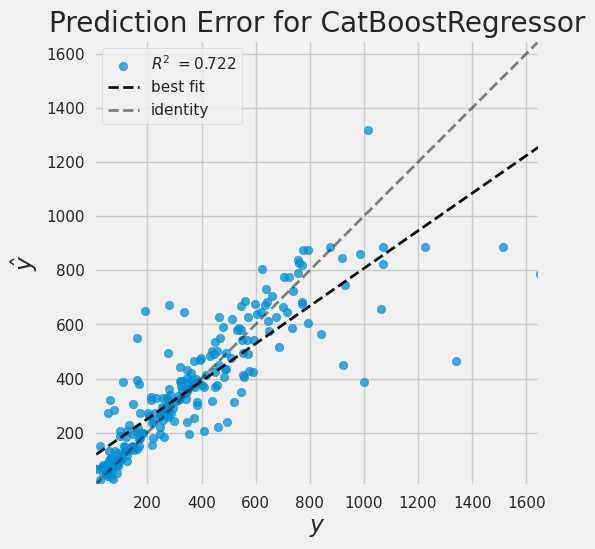

In [249]:
plot_model(tuned_model, 
           plot='error',
           #save=True,
          )

In [250]:
#https://pycaret.gitbook.io/docs/get-started/functions/analyze#plot_model
    

** Evaluate Model with evaluate_model()

The evaluate_model() displays a user interface for analyzing the performance of a trained model. 
It calls the plot_model().


In [251]:
# evaluate the model

evaluate_model(tuned_model)



interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [252]:
# Only for classification
#interpret_model(tuned_model)

### interpret model

** interpret_model
This function analyzes the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (Shapley Additive exPlanations). 

In [253]:
#interpret_model(tuned_model) # this functions is only for trees

** dashboard
The dashboard function generates the interactive dashboard for a trained model. The dashboard is implemented using ExplainerDashboard 

In [254]:
dashboard(tuned_model)

Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...


For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://172.31.23.247:8050


** eda
This function generates automated Exploratory Data Analysis (EDA) using the AutoViz library. You must install Autoviz separately pip install autoviz to use this function.

In [255]:
#%matplotlib inline
eda(display_format = 'bokeh')

Shape of your Data Set loaded: (750, 35)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    34 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Regression problem #####################
Number of variables = 34 exceeds limit, finding top 30 variables through XGBoost
    No categorical feature reduction done. All 32 Categorical vars selected 
    Removing correlated variables from 2 numerics using SULO method

After removing highly correlated variables, following 1 numeric vars selected: ['income_employee_day']
    Adding 32 categorical variables to reduced numeric variables  of 1
############## F E A T U R E   S E L E C T I O N  ####################
Current

Column
    [0] Row
        [0] HoloViews(DynamicMap, height=400, sizing_mode='fixed', width=600)
        [1] Column
            [0] WidgetBox
                [0] Select(margin=(20, 20, 20, 20), options=['income_employee_day'], value='income_employee_day', width=250)
            [1] VSpacer()

Column
    [0] Row
        [0] HoloViews(DynamicMap, height=300, sizing_mode='fixed', width=700)
        [1] Column
            [0] WidgetBox
                [0] Select(margin=(20, 20, 20, 20), options=['state_Tamaulipas', ...], value='state_Tamaulipas', width=250)
            [1] VSpacer()

Column
    [0] Row
        [0] HoloViews(DynamicMap, height=400, sizing_mode='fixed', width=600)
        [1] Column
            [0] WidgetBox
                [0] Select(margin=(20, 20, 20, 20), options=['income_employee_day'], value='income_employee_day', width=250)
            [1] VSpacer()

HoloViews(DynamicMap)

HoloViews(Violin, height=300, sizing_mode='fixed', width=700)

Row
    [0] WidgetBox
        [0] Select(name='X-Axis', options=['state_Tamaulipas', ...], value='state_Tamaulipas')
        [1] Select(name='Y-Axis', options=['income_employee_day', ...], value='income_employee_day')
    [1] ParamFunction(function, _pane=HoloViews)

Time to run AutoViz (in seconds) = 5


** deep check
this function runs a full suite check over a trained model using the deepcheck library

In [256]:
deep_check(tuned_model)

Full Suite: 
 
 
 
 0/35 [Time: 00:00]

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_CCBLSKRT05UIRODXMO5BXXC02">Full Suite</h1>\n<…

### Finalize the model
This function trains a given model on the entire dataset including the hold-out set.

In [257]:
# Finally trains a the model on the entire dataset including the hold-out set.

final_model = finalize_model(tuned_model)

### saving the model
This function saves the transformation pipeline and a trained model object into the current working directory as a pickle file for later use.

In [258]:
save_model(final_model, os.path.join(cfg.paths.models, cfg.file_names.ml_profiling_best))

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['income_employee_day',
                                              'employees_business'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['state'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['state'],
                                     transformer=OneHotEncoder(cols=['state'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('transformation',
                  TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                 ('normalize', Transforme

### Predict
This function generates the label using a trained model.  When data is None, it predicts label and score on the holdout set. 

In [259]:
predict_model(tuned_model, data=unseen_data) 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,57.3767,9862.6651,99.3110,0.8568,0.3307,0.2727


,state,income_employee_day,employees_business,salary_employee_day,prediction_label
0,Veracruz,7994.591309,5,329.596008,265.136555
1,Puebla,1548.324097,4,37.371990,39.236576
2,Veracruz,18250.646484,7,942.254700,803.369865
3,Oaxaca,7060.781738,5,131.860886,191.734658
4,Coahuila,21440.226562,10,549.892944,541.725037
...,...,...,...,...,...
745,Oaxaca,13227.475586,6,482.449585,403.923188
746,Veracruz,10511.706055,5,450.042999,379.853257
747,Tlaxcala,10162.719727,5,361.778778,420.062617
748,Guanajuato,7328.578613,7,250.115936,293.010745
